In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df1 = pd.read_csv('nps.csv')
df1

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0
...,...,...,...
3321,2020-12-30 21:24:28,289219785,8
3322,2020-12-31 02:01:19,187133285,7
3323,2020-12-31 05:30:00,202035502,10
3324,2020-12-31 06:12:32,196225609,10


In [20]:
def cat(x):
    if (x >= 0) & (x <= 6):
        return 'Detractor'
    elif (7 <= x) & (x <= 8):
        return 'Passive'
    elif (9 <= x) & (x <= 10):
        return 'Promoter'

df1['NPS'] = df1['score'].apply(cat)
df1

,event_date,user_id,score,NPS
0,2020-01-01 19:00:51,290067447,8,Passive
1,2020-01-02 17:34:43,223014806,10,Promoter
2,2020-01-02 19:11:55,187864388,10,Promoter
3,2020-01-02 19:27:00,318758952,8,Passive
4,2020-01-02 21:42:19,189933311,0,Detractor
...,...,...,...,...
3321,2020-12-30 21:24:28,289219785,8,Passive
3322,2020-12-31 02:01:19,187133285,7,Passive
3323,2020-12-31 05:30:00,202035502,10,Promoter
3324,2020-12-31 06:12:32,196225609,10,Promoter


In [21]:
df1['event_date'] = pd.to_datetime(df1['event_date'])
df1['month'] = df1['event_date'].dt.month
df1

,event_date,user_id,score,NPS,month
0,2020-01-01 19:00:51,290067447,8,Passive,1
1,2020-01-02 17:34:43,223014806,10,Promoter,1
2,2020-01-02 19:11:55,187864388,10,Promoter,1
3,2020-01-02 19:27:00,318758952,8,Passive,1
4,2020-01-02 21:42:19,189933311,0,Detractor,1
...,...,...,...,...,...
3321,2020-12-30 21:24:28,289219785,8,Passive,12
3322,2020-12-31 02:01:19,187133285,7,Passive,12
3323,2020-12-31 05:30:00,202035502,10,Promoter,12
3324,2020-12-31 06:12:32,196225609,10,Promoter,12


In [22]:
df11 = df1.groupby(['month'])['NPS'].count()
df11.name = 'Sum'
df11

month
1     328
2     273
3     230
4     301
5     307
6     327
7     401
8     399
9     221
10    296
11    117
12    126
Name: Sum, dtype: int64

In [23]:
df12 = df1[df1['NPS'] == 'Detractor'].groupby(['month'])['NPS'].count()
df12.name = 'Detractor'
df12

month
1     31
2     22
3     33
4     36
5     33
6     32
7     48
8     40
9     18
10    36
11    18
12    22
Name: Detractor, dtype: int64

In [24]:
df13 = df1[df1['NPS'] == 'Promoter'].groupby(['month'])['NPS'].count()
df13.name = 'Promoter'
df13

month
1     215
2     161
3     125
4     178
5     191
6     215
7     258
8     256
9     135
10    177
11     72
12     62
Name: Promoter, dtype: int64

In [25]:
df2 = pd.merge(df12, df13, on= 'month')
df2 = pd.merge(df2, df11, on= 'month')
df2

,Detractor,Promoter,Sum
month,,,
1,31,215,328
2,22,161,273
3,33,125,230
4,36,178,301
5,33,191,307
6,32,215,327
7,48,258,401
8,40,256,399
9,18,135,221


In [26]:
df2['Score'] = (df2['Promoter'] - df2['Detractor']) / df2['Sum']
df2.drop(columns= ['Promoter', 'Detractor', 'Sum'], inplace= True)
df2.reset_index()

,month,Score
0,1,0.560976
1,2,0.509158
2,3,0.400000
3,4,0.471761
4,5,0.514658
5,6,0.559633
6,7,0.523691
7,8,0.541353
8,9,0.529412
9,10,0.476351


In [27]:
df2

,Score
month,
1,0.560976
2,0.509158
3,0.400000
4,0.471761
5,0.514658
6,0.559633
7,0.523691
8,0.541353
9,0.529412


In [35]:
df3 = pd.read_csv('muscle_labs.csv')
df3

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500
...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50


In [36]:
df3['end_date'] = pd.to_datetime(df3['end_date'])
df3['start_date'] = pd.to_datetime(df3['start_date'])
df3

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500
...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50


In [37]:
df3['churn_month'] = df3['end_date'].dt.strftime('%Y-%m')
df3

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,2014-12
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,2014-11
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,2014-11
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,2014-12
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,2015-11
...,...,...,...,...,...,...,...
10492,18069,12456,2015-01-20 13:54:39,2014-09-19 00:38:00,monthly,50,2015-01
10493,18068,12457,2015-01-20 13:38:29,2014-10-19 00:23:00,monthly,50,2015-01
10494,319,12458,2015-01-20 10:16:19,2014-11-18 21:09:16,monthly,50,2015-01
10495,343,12460,2015-01-20 18:50:56,2014-11-19 05:50:32,monthly,50,2015-01


In [ ]:
month_churn = pd.DataFrame(df3.groupby(['churn_month']).size(), columns= ['total_churned'])
month_churn

In [81]:
churn = pd.DataFrame(df3['started_month'].unique(), columns= ['year-month'])
churn = churn.sort_values(by=['year-month'])
churn

,year-month
45,2011-01
44,2011-02
34,2011-03
46,2011-04
36,2011-05
39,2011-06
32,2011-07
37,2011-08
28,2011-09
31,2011-10


In [82]:
churn = pd.merge(left=churn, right=month_churn, how='left', left_on='year-month', right_index=True)
churn

,year-month,total_churned
45,2011-01,NaN
44,2011-02,NaN
34,2011-03,8.0
46,2011-04,16.0
36,2011-05,29.0
39,2011-06,27.0
32,2011-07,37.0
37,2011-08,40.0
28,2011-09,39.0
31,2011-10,47.0


In [83]:
churn.fillna(0,inplace= True)

In [88]:
import datetime as dt

def get_active_user(yearmonth):
    date = dt.datetime(int(yearmonth[:4]), int(yearmonth[-2:]), 1)
    return ((df3["start_date"] < date) & (date <= df3["end_date"])).sum()

get_active_user('2011-07')

194

In [93]:
churn['total_active_user'] = churn['year-month'].apply(get_active_user)
churn['churn_rate'] = churn['total_churned'] / churn['total_active_user']
churn

,year-month,total_churned,total_active_user,churn_rate
45,2011-01,0.0,0,NaN
44,2011-02,0.0,17,0.000000
34,2011-03,8.0,47,0.170213
46,2011-04,16.0,82,0.195122
36,2011-05,29.0,105,0.276190
39,2011-06,27.0,155,0.174194
32,2011-07,37.0,194,0.190722
37,2011-08,40.0,220,0.181818
28,2011-09,39.0,247,0.157895
31,2011-10,47.0,254,0.185039


C:\Users\Duc\AppData\Local\Temp\ipykernel_4748\4113318082.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(churn['year-month'], rotation= 60)


[Text(0, 0, '2011-01'),
 Text(1, 0, '2011-02'),
 Text(2, 0, '2011-03'),
 Text(3, 0, '2011-04'),
 Text(4, 0, '2011-05'),
 Text(5, 0, '2011-06'),
 Text(6, 0, '2011-07'),
 Text(7, 0, '2011-08'),
 Text(8, 0, '2011-09'),
 Text(9, 0, '2011-10'),
 Text(10, 0, '2011-11'),
 Text(11, 0, '2011-12'),
 Text(12, 0, '2012-01'),
 Text(13, 0, '2012-02'),
 Text(14, 0, '2012-03'),
 Text(15, 0, '2012-04'),
 Text(16, 0, '2012-05'),
 Text(17, 0, '2012-06'),
 Text(18, 0, '2012-07'),
 Text(19, 0, '2012-08'),
 Text(20, 0, '2012-09'),
 Text(21, 0, '2012-10'),
 Text(22, 0, '2012-11'),
 Text(23, 0, '2012-12'),
 Text(24, 0, '2013-01'),
 Text(25, 0, '2013-02'),
 Text(26, 0, '2013-03'),
 Text(27, 0, '2013-04'),
 Text(28, 0, '2013-05'),
 Text(29, 0, '2013-06'),
 Text(30, 0, '2013-07'),
 Text(31, 0, '2013-08'),
 Text(32, 0, '2013-09'),
 Text(33, 0, '2013-10'),
 Text(34, 0, '2013-11'),
 Text(35, 0, '2013-12'),
 Text(36, 0, '2014-01'),
 Text(37, 0, '2014-02'),
 Text(38, 0, '2014-03'),
 Text(39, 0, '2014-04'),
 Text(40, 

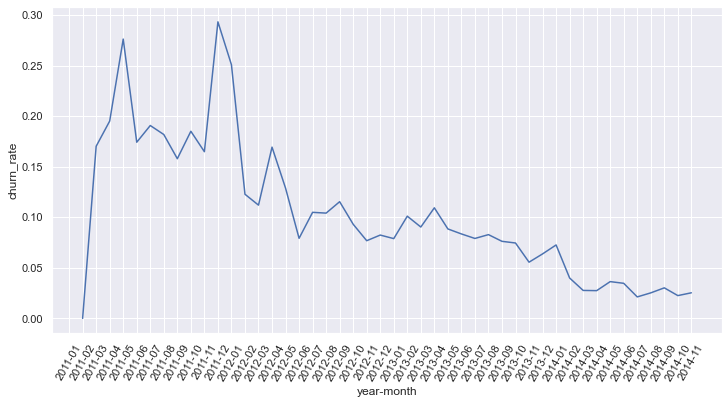

In [110]:
import seaborn as sns
sns.set_theme()
fig, ax = plt.subplots(1,1, figsize= (12,6))
sns.lineplot(x= churn['year-month'], y= churn['churn_rate'], ax= ax)
ax.set_xticklabels(churn['year-month'], rotation= 60)